In [3]:
from sklearn.datasets import load_iris

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
from sklearn.preprocessing import StandardScaler 

In [8]:
iris = load_iris()

In [9]:
x = iris.data
y = iris.target

In [11]:
class_names = iris.target_names

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [16]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [17]:
random_model = RandomForestClassifier(random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)


In [18]:
model = SVC(kernel="rbf", probability=True)

In [28]:
name = "RandomForest"  

if name == "RandomForest":
    model = RandomForestClassifier()
elif name == "DecisionTree":
    model = DecisionTreeClassifier()
elif name == "SVM":
    model = SVC()
else:
    raise ValueError("Invalid model name")


model.fit(x_train, y_train)


RandomForestClassifier()

In [34]:
models = {
    "SVM": SVC(kernel="rbf", probability=True),
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier()
}

for name, model in models.items():
    print(f"Training: {name}")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Training: SVM
SVM Accuracy: 1.00
Training: RandomForest
RandomForest Accuracy: 1.00
Training: DecisionTree
DecisionTree Accuracy: 1.00



Training: SVM
SVM Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



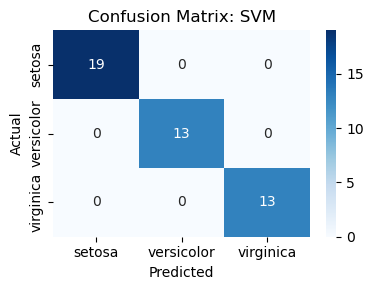


Training: RandomForest
RandomForest Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



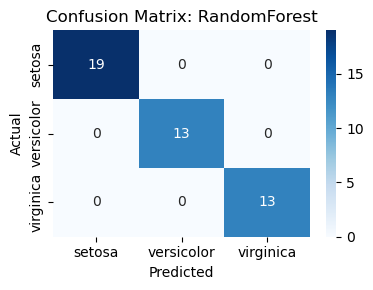


Training: DecisionTree
DecisionTree Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



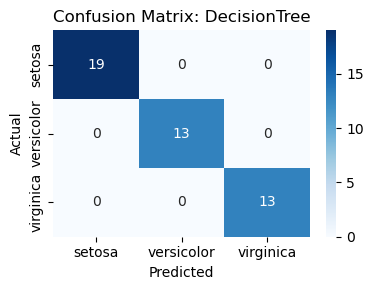

In [35]:

models = {
    "SVM": SVC(kernel="rbf", probability=True),
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier()
}

# Loop through each model
for name, model in models.items():
    print(f"\nTraining: {name}")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()